# <center> <h1>   🎮  🧑‍💻  🌎

In [47]:
# gym dan kerakli funksiyalarni chaqirib olamiz 
import gym
from gym import Env # Environmet
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete # Action Space lar

# yordamchi kutubxonalarni chaqirib olamiz
import numpy as np
import random

# stable baselinesdan kerakli funksiyalarni chaqirib olamiz
from stable_baselines3 import PPO # Politikamiz
from stable_baselines3.common.vec_env import DummyVecEnv # DummyVecEnv -  Pythonda har bir muhitni ketma-ket chaqirib, 
# bir nechta muhit uchun oddiy vektorli qobiq hosil qiladi. Bu bizga hisob kitoblarni tezroq amalga oshirish imkonini beradi.
# Oddiyroq aytadigan bo'lsak modelni o'qitish uchun frame(kadrlarni)larni batch qilib beradi.

from stable_baselines3.common.evaluation import evaluate_policy  # Politikamizni sinab ko'ramiz

# <center> Action Space - Harakatlar 

`Biz siz bilan turli xil modellarni o'qitishda har xil harakatlar bilan ishladik, Keling endi ularga alohida to'xtalib o'tamiz.`

# <center> Discrete

`Diskret: Bu butun sonlardan tashkil topgan to'plam. Misol uchun, bu ma'lum bir muhitda agent uchun mavjud bo'lgan harakatlar to'plami bo'lishi mumkin.`

In [48]:
Discrete(3)
# 3 ta qiymatdan iborat Discrete yaratamiz

Discrete(3)

In [49]:
Discrete(3).sample()
# ishga tushirsak 0,1,2 chiqishi mumkin
# Masalan biz moshinani yurishga o'rgatayotgan bo'lsak
# 0 bu joyida turish
# 1 bu oldinga yurish
# 2 bu orqaga yurish bo'lishi mumkin

0

# <center>  Box

`Box: Bu float bo'lgan sonlar to'plami. Masalan, bu bir qator koordinatalar, tezliklar yoki boshqa doimiy parametrlar bo'lishi mumkin.`

In [54]:
Box(0,1, shape=(3,3))
# Box yaratib beradi

Box(0.0, 1.0, (3, 3), float32)

In [55]:
Box(10,20, shape=(3,3)).sample()
# 3x3 massiv yaratadi va qiymatlari 10,20 gacha bo'ladi
# Masalan bizdagi  3x3 massiv bizda qandaydur raketadning
# burilish burchagi, tezligi, joylashuvi kabi parametrlarining
# boshlang'ich, o'rtacha, va oxirgi qiymatlari bo'lishi mumkin

array([[19.834074, 16.883692, 12.213302],
       [15.545046, 18.50844 , 19.857172],
       [15.783483, 11.1096  , 18.284004]], dtype=float32)

# <center> Tuple 

`Tuple: Bu bir nechta har xil to'plamarni birlashtiradi. Masalan, bu agent holati yoki harakatlarining turli tomonlarini ifodalovchi Box va Diskret to'plami bo'lishi mumkin.`

In [56]:
Tuple((Discrete(3), Box(10,20, shape=(3,3))))
# Discrete va Box dan iborat kortej

Tuple(Discrete(3), Box(10.0, 20.0, (3, 3), float32))

In [57]:
Tuple((Discrete(3), Box(10,20, shape=(3,3)))).sample()

(2,
 array([[17.684246, 10.299343, 19.599497],
        [19.226553, 19.267649, 15.671322],
        [18.616558, 17.657515, 18.217913]], dtype=float32))

# <center> Dict

`Dict: Bu dictionary. Bu kalitlar yordamida holatining turli tomonlarini(o'ng, chap) yoki harakatlarini(oldinga, orqaga) ifodalash uchun ishlatilishi mumkin.'`

In [58]:
Dict({"Olchami":Discrete(2), "Tezlik":Box(10,20, shape=(1,))})
# Dictionary yaratish

Dict('Olchami': Discrete(2), 'Tezlik': Box(10.0, 20.0, (1,), float32))

In [59]:
Dict({"Olchami":Discrete(2), "Tezlik":Box(10,20, shape=(1,))}).sample()

OrderedDict([('Olchami', 1), ('Tezlik', array([19.86958], dtype=float32))])

# <center> MultiBinary

`MultiBinary: Bu ikkilik qiymatlar to'plami, har biri mustaqil o'zgaruvchi(One hot encoded binary values).`

In [61]:
MultiBinary(4)
# Binary elmentlarni yaratamiz
# ya'ni 0 va 1 dan iboart 4 ta qiymat

MultiBinary(4)

In [62]:
MultiBinary(4).sample()

array([0, 1, 0, 0], dtype=int8)

# <center> MultiDiscrete

`MultiDiscrete: Bu diskretga o'xshash to'plam, lekin bir nechta diskret o'zgaruvchilarga ega bo'lish imkonini beradi. `

In [63]:
MultiDiscrete([5,4,6])
# MultiDiscrete ya'ni bir nechta Discrete qiymatlarni qaytaradi
# 5 gacha, 4 gacha, va 6 gacha bo'lgan qiymatlarni qayataradi

MultiDiscrete([5 4 6])

In [64]:
MultiDiscrete([5,4,6]).sample()

array([3, 1, 1], dtype=int64)

# <center> `Environment Yaratish`

`Ta'savur qiling bizda poyga o'yini bor. Poyganing qoidasi shundan iboratki, kim tezlikni 55 va 60 orasida ushlab tura olsa yutadi.
Bu yerda bizda 3 ta harakat bo'ladi, gaz, tormoz, va haraktsizlik.
Demak biz agentimizga tezlikni 55 va 60 oralig'ida ushlab turishni o'rgatishmiz kerak.`

<center>

# 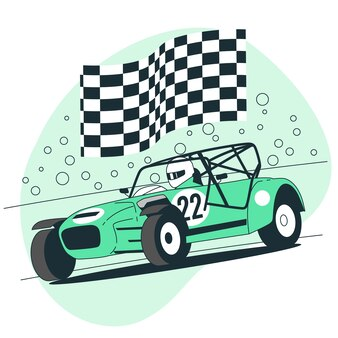

# 

In [17]:
# Clasimizning boshlang'ich ko'rinishi

class RaceEnv(Env):

    # kirish
    def __init__(self):
        pass

    # keyingi qadamga o'tish
    def step(self, action):
        pass

    # ko'rsatish
    def render(self):
        pass

    # boshidan boshlash
    def reset(self):
        pass
    

In [18]:
# boshlang'ich sozlamalar
class RaceEnv(Env):

    def __init__(self):
        self.action_space = Discrete(3)# 3 ta harakatdan iborat boladi bular, 1-gaz, 2-tormoz, 3-harakatsizlik
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        self.state = 56 + random.randint(-3,3) # boshlang'ich holatimiz(qiymatimiz)
        self.race_length = 120 # episodening davomiyligi. Oddiyroq aytadigan bo'lsak bizning poygamiz 120 sekund davom etadi 😁.
  
    def step(self, action):
        pass
            
    def render(self):
        pass

    def reset(self):
        pass
        
    
    

In [19]:
Discrete(3)
# 3 talik Discrete qiymatni oladi

Discrete(3)

In [20]:
Discrete(3).sample()
# Bular [0,1,2]

2

In [22]:
Box(low=np.array([0]), high=np.array([100]), shape=(1,))
# boximizning eng past qiymati 0 eng baland qiymati 100 ga teng va u 1 dona son qaytaradi

Box(0.0, 100.0, (1,), float32)

In [23]:
Box(low=np.array([0]), high=np.array([100]), shape=(1,)).sample()
# 0 da 100 gacha bo'lgan random sonni qaytaradi

array([64.919556], dtype=float32)

In [24]:
56 + random.randint(-3,3)# boshlangich holatimiz(qiymatimiz) 
# demak o'yinimizdagi poyga mashinamizning boshlang'ich qiymatini tanlab olamiz.

59

In [65]:
class RaceEnv(Env):

    def __init__(self):
        self.action_space = Discrete(3)# 3 ta harakatdan iborat boladi bular, 1-gaz, 2-tormoz, 3-harakatsizlik
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        self.state = 56 + random.randint(-3,3) # boshlang'ich holatimiz(qiymatimiz)
        self.race_length = 120 # episodening davomiyligi. Oddiyroq aytadigan bo'lsak bizning poygamiz 120 sekund davom etadi 😁.

    def step(self, action):
        # har qadamda biz tezlikdagi o'zgarishlarni amalga oshiramiz
        # bizda 3 xil harakat bor Discrete(3), 0,1,2
        # 0 tezlikni 1 marta pastga tushganini bildiradi
        # 1 o'zgarishlar amalga oshirilamaganligini bildiradi
        # 2 tezlikni 1 marta tepaga oshganini bildiradi
        # pastda shuni yozganmiz
        self.state += action-1

        # poyga vaqtini har stepda kamytiramiz
        self.race_length -= 1

        # Reward hisoblash
        if self.state >= 55 and self.state <= 60:
            reward = 1
        else:
            reward = -1

        # o'yinning holatini bilish uchun pastdagi kodni ishlatamiz
        # 120 sekundan tugasa biz o'yinni tugatishimiz kerak
        if self.race_length <= 0:
            done = True
        else:
            done = False

        info = {} # bu yerda biz qandaydur kerakli ma'lumotlarni kiritishimiz mumkin.

        return self.state, reward, done, info
            

    def render(self):
        # Agar biz o'yin bilan ishlaganimizda bu yerga kod yozsak bo'lar edi
        # render asosan bizda ekraga chiqarish uchun  kerak,
        # bizda hozir bunday hech narsa yo'q shuning uchun uni bo'sh qoldiryapmiz
        pass

    def reset(self):
        # bu yerda hamma narsani boshlang'ich qiymatiga qaytaramiz
        self.state = np.array([56 + random.randint(-3,3)]).astype(float)
        self.race_length = 120
        return self.state
        
    

In [67]:
env = RaceEnv()

In [68]:
env.observation_space

Box(0.0, 100.0, (1,), float32)

In [69]:
env.observation_space.sample()

array([61.191566], dtype=float32)

In [70]:
env.action_space

Discrete(3)

In [71]:
env.action_space.sample()

0

In [72]:
env.reset()

array([54.])

In [76]:
# Test
# ishlatib ko'ramiz
episodes = 5

for episode in range(1, episodes+1):

    obs = env.reset()
    done = False
    score = 0

    while not done:
        env.render() ## O'yinni ekranga chiqarish. Esingizda bo'lsa biz bu yerda hech qanday kod yozmadik demak ekranga ham hech nima chiqmaydi.
        action = env.action_space.sample() # random harakatlarni olamiz
        obs, reward, done, info = env.step(action) #  keyingi qadamga o'tamiz
        score+=reward

    print("Episodes:",  episode, ". Score:", score)
env.close()
# Pastdagi qiymatlarga qarab ko'rishingiz mumkinki 
# bizning Environment ishlayapti😎

Episodes: 1 . Score: -20
Episodes: 2 . Score: 38
Episodes: 3 . Score: -48
Episodes: 4 . Score: -62
Episodes: 5 . Score: -108


In [77]:
log_path = "Training\Logs"
log_path

'Training\\Logs'

In [78]:
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path)
# pastga e'tibor bersaning modelni yaratish jarayoni DummyVecEnv qo'llanilgan
# biz buni ishlatishimizdan oldin. Judaham yaxshi

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [37]:
model.learn(total_timesteps=100000)
# o'qitamiz

Logging to Training\Logs\PPO_14
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 120      |
|    ep_rew_mean     | -25.8    |
| time/              |          |
|    fps             | 149      |
|    iterations      | 1        |
|    time_elapsed    | 13       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 120         |
|    ep_rew_mean          | -32.6       |
| time/                   |             |
|    fps                  | 135         |
|    iterations           | 2           |
|    time_elapsed         | 30          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009734598 |
|    clip_fraction        | 0.0489      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.000125   

Biz log larimizni tensorboarda ko'rishimiz mumkin. Birinchi bo'lib tensorboardni ishlatib olamiz

    1-bo'lib yadroni activate qilamiz
    2-qadam. tensorboard --logdir D:\IT\Python\RL\rl\Training\Logs\PPO_14 cmdga yozamiz (logdir dan keyin hamma loglarni saqlab qo'ygan papkasini ko'rsatadi)
    3-qadam. Brauzerda http://localhost:6006/ linkni ochamiz

<center>

# 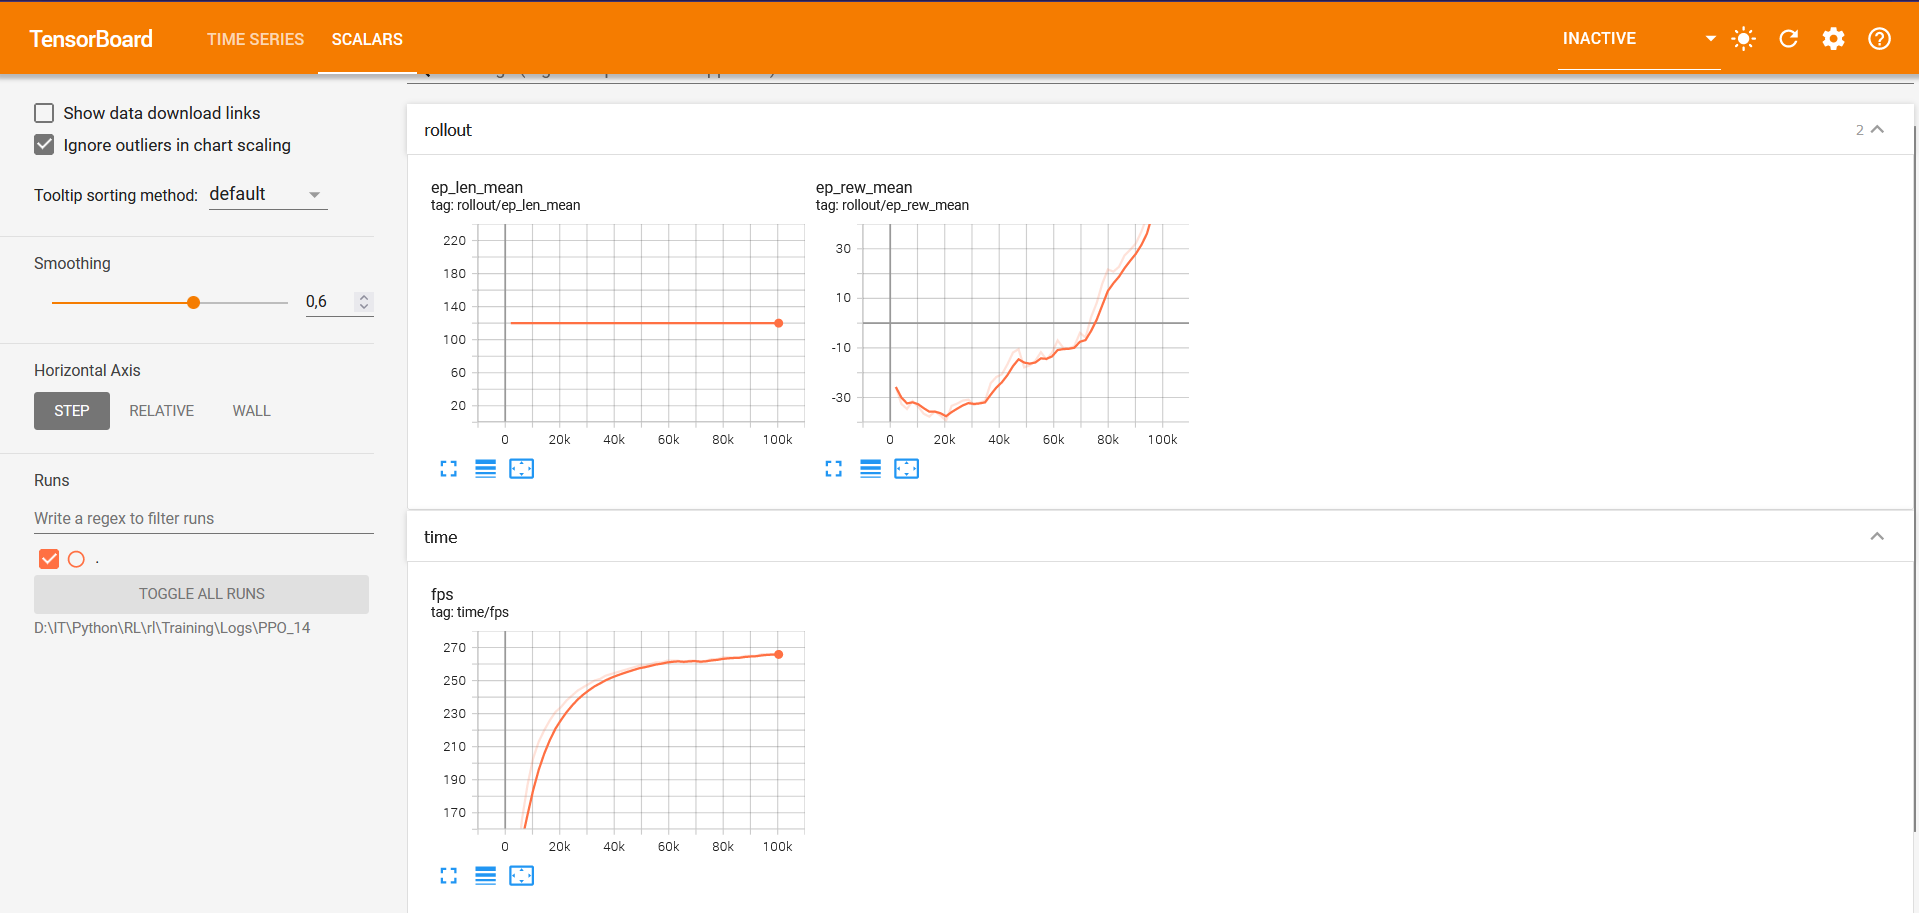

# 

In [38]:
shower_path = "Training\Saved_Models\Shower_PPO_Model"

In [39]:
model.save(shower_path)
# modelni saqlab olamiz

In [40]:
del model
# modelni o'chiramiz

In [80]:
model = PPO.load(shower_path, env)
# modelni yuklab olamiz

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [83]:
evaluate_policy(model, env, n_eval_episodes=10) # Politikamiz/Strategiyamizni test qilib ko'ramiz
# 72.0 bu 10 ta episod uchun o'rtacha rewardi(mukofot), 96.0 bo'lsa uing std si
# Demak biz std 96.0 bo'lganda o'rtacha 72.0 reward olyapmiz


(96.0, 72.0)

In [45]:
# Demak o'qitgan modelimizni ishlatib ko'ramiz
episodes = 10

for episode in range(1, episodes+1):

    obs = env.reset()
    done = False

    score = 0

    while not done:
        env.render()
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        score+=reward

    print("Episode:{}, Score:{}".format(episode, score))
env.close() 
# Testda ko'rishingiz mumkinki maxsimum 82 ball to'plamagnmiz bu juda yaxshi. 😁

Episode:1, Score:8
Episode:2, Score:20
Episode:3, Score:-42
Episode:4, Score:-46
Episode:5, Score:66
Episode:6, Score:82
Episode:7, Score:26
Episode:8, Score:42
Episode:9, Score:-26
Episode:10, Score:10


# <center> <h1>    🧑‍💻  🚀